Weather data keys: dict_keys(['cod', 'message', 'cnt', 'list', 'city'])
Total weather records: 40
Weather description: clear sky
Maximum Temperature:  304.58
Minimum Temperature:  292.56
Missing values in the dataframe:
Temperature            0
humidity               0
wind_speed             0
weather_description    0
dtype: int64
Weather Data Head:
                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2024-11-10 21:00:00        21.54        52        0.44           clear sky
2024-11-11 00:00:00        20.39        55        0.56           clear sky
2024-11-11 03:00:00        23.18        47        1.79           clear sky
2024-11-11 06:00:00        28.15        35        4.38           clear sky
2024-11-11 09:00:00        30.12        29        3.26           clear sky


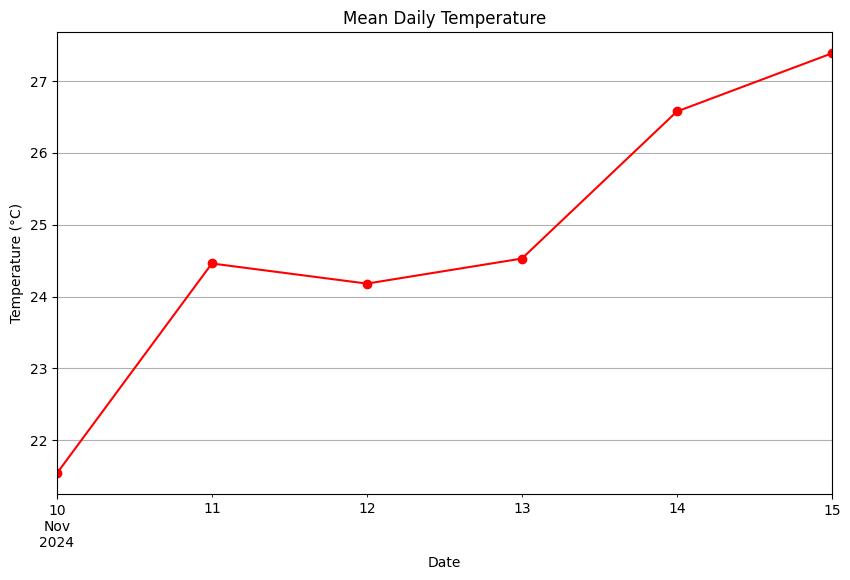

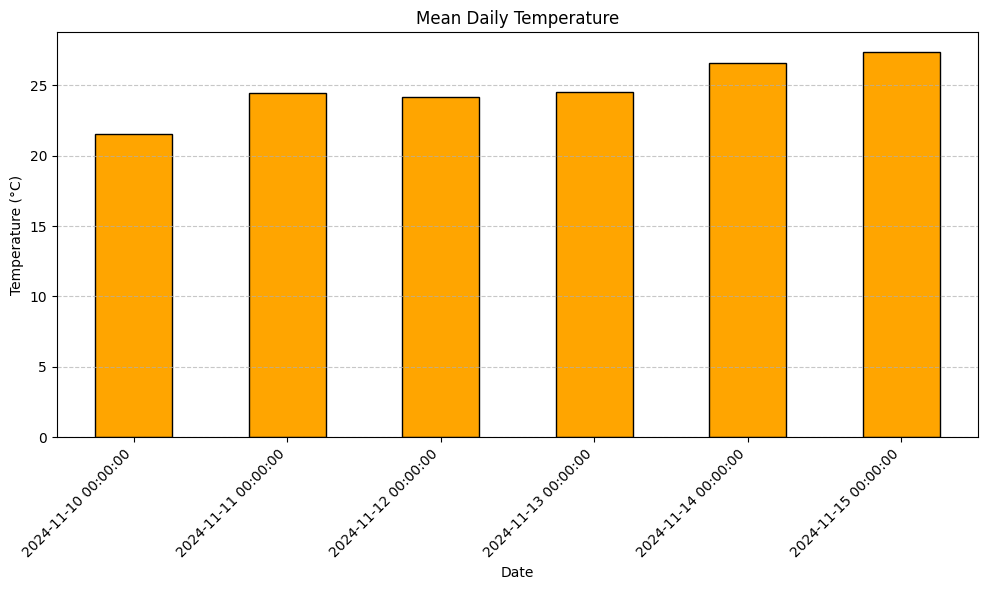

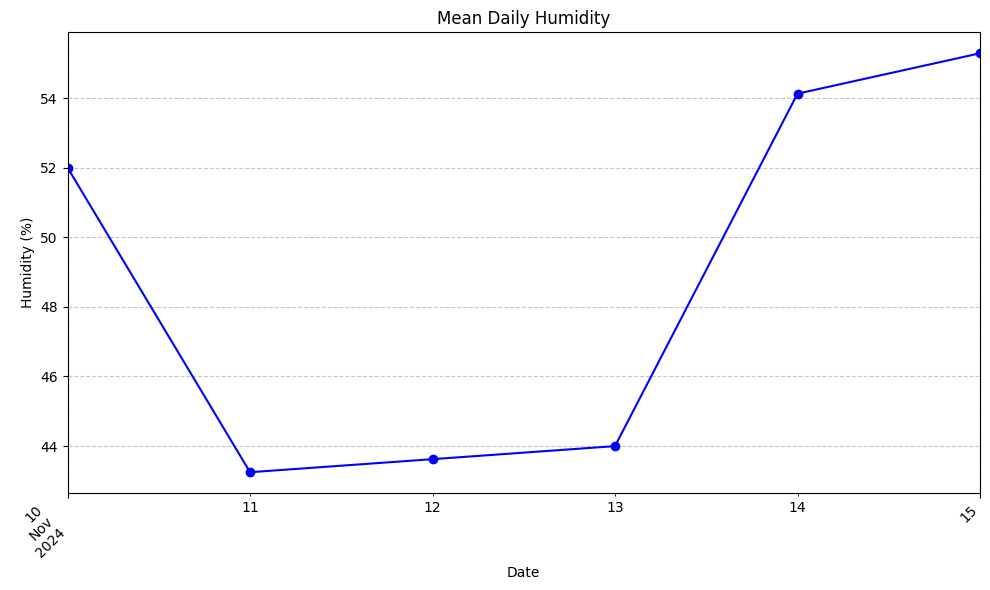

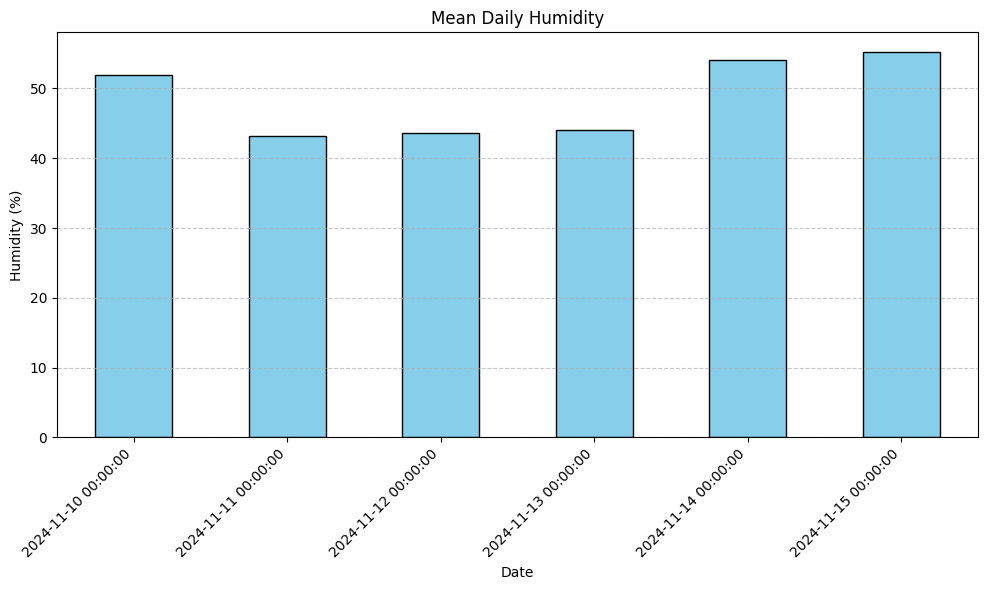

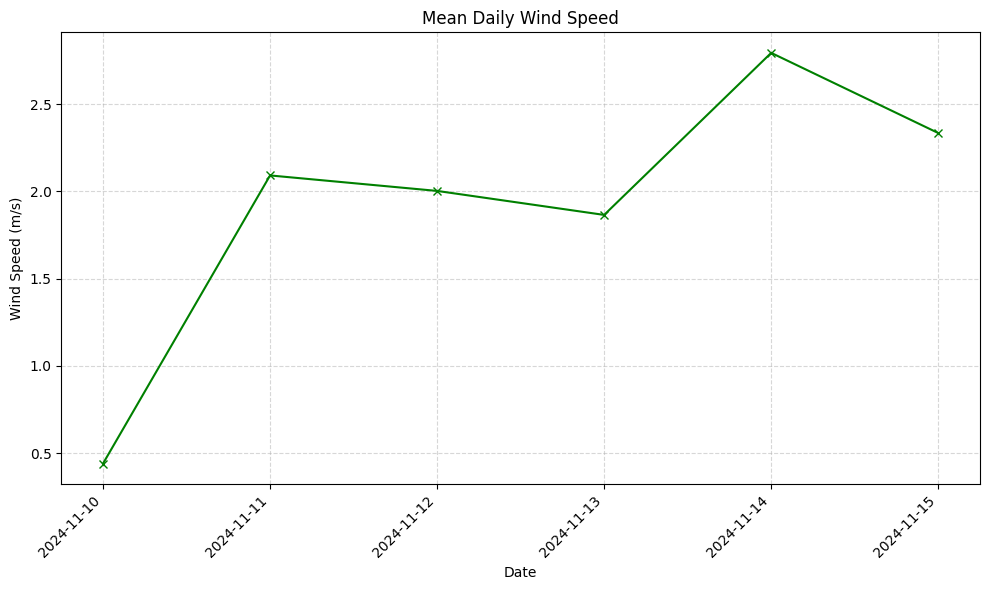

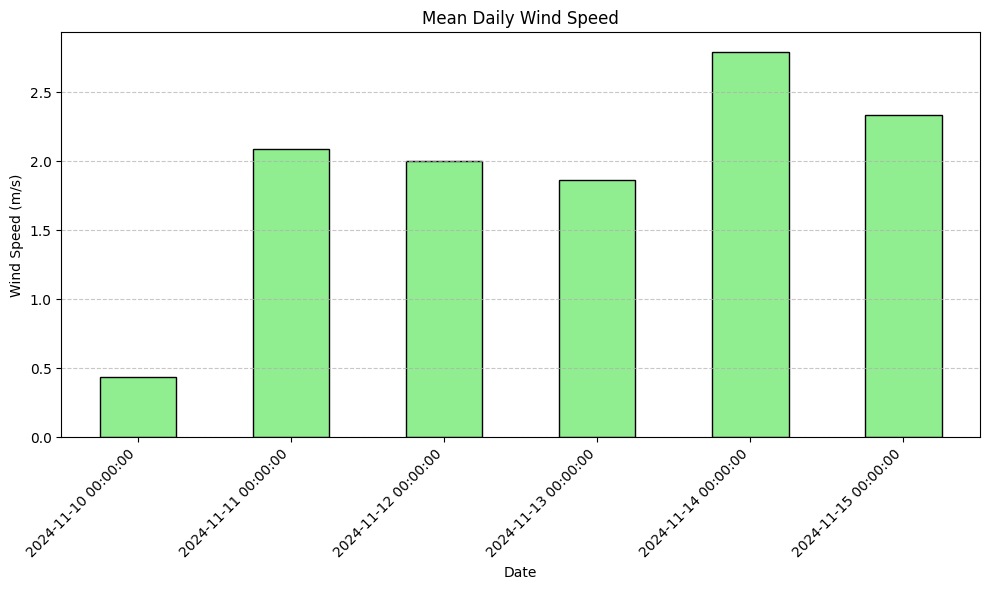

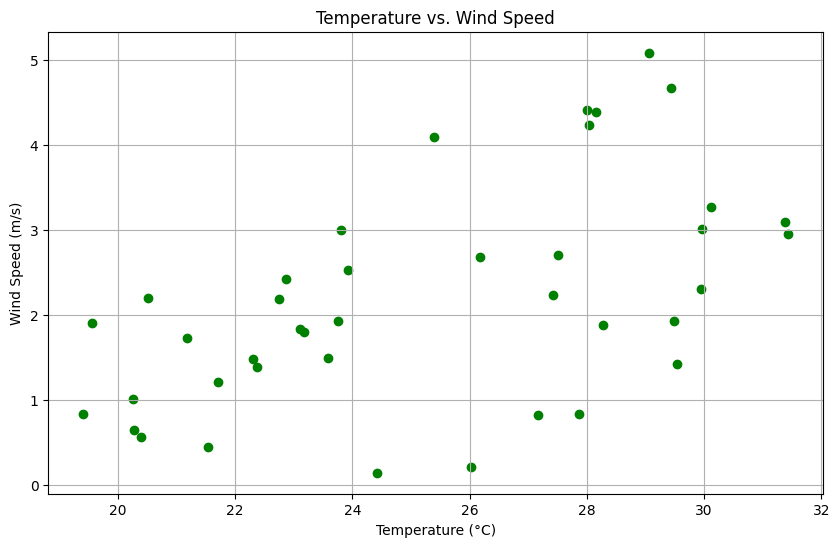

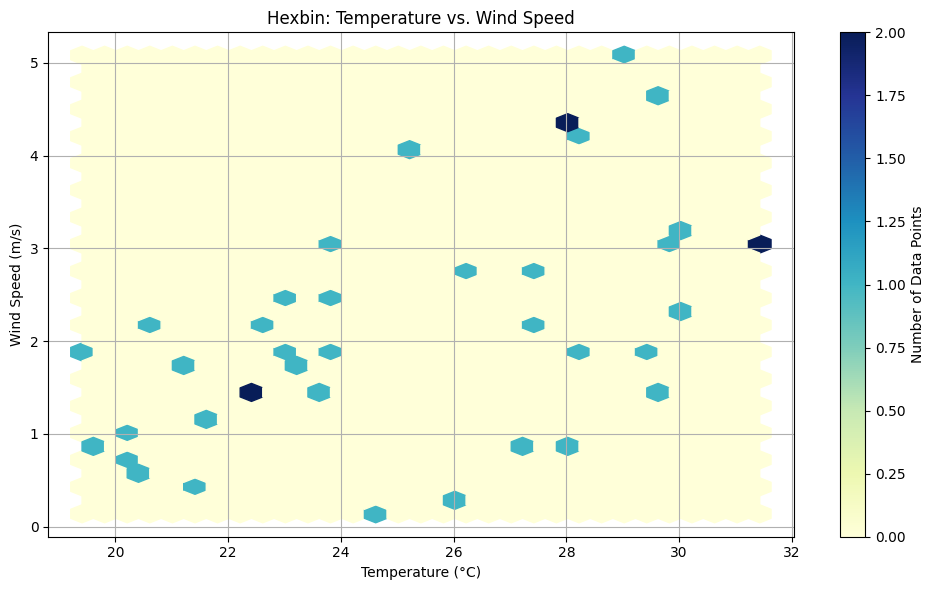

<Figure size 1000x600 with 0 Axes>

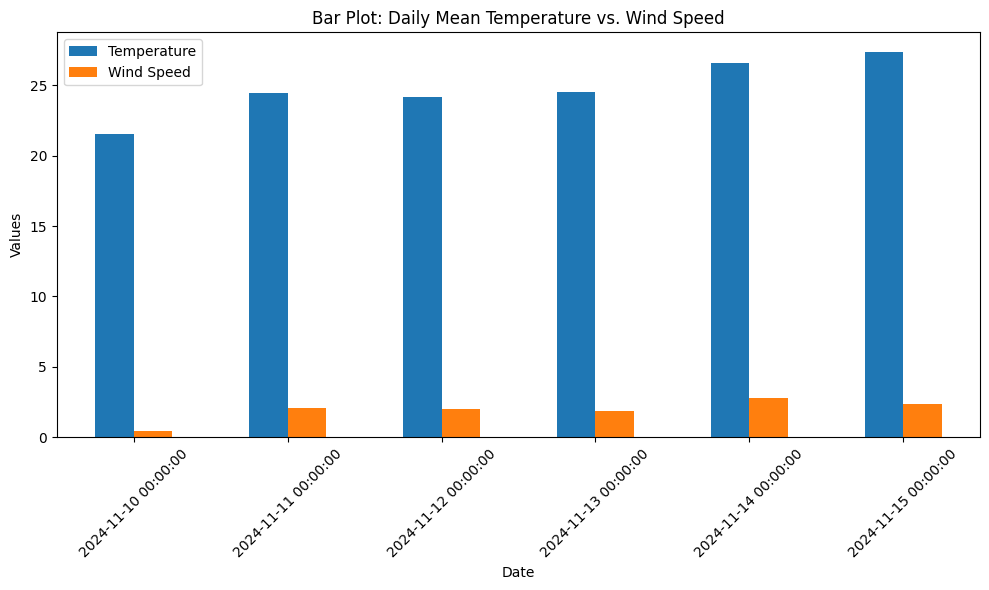

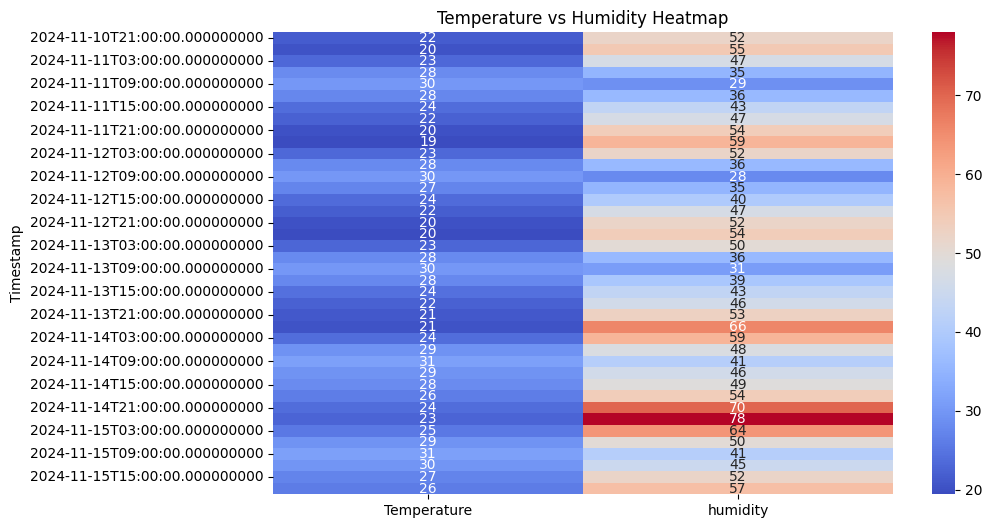

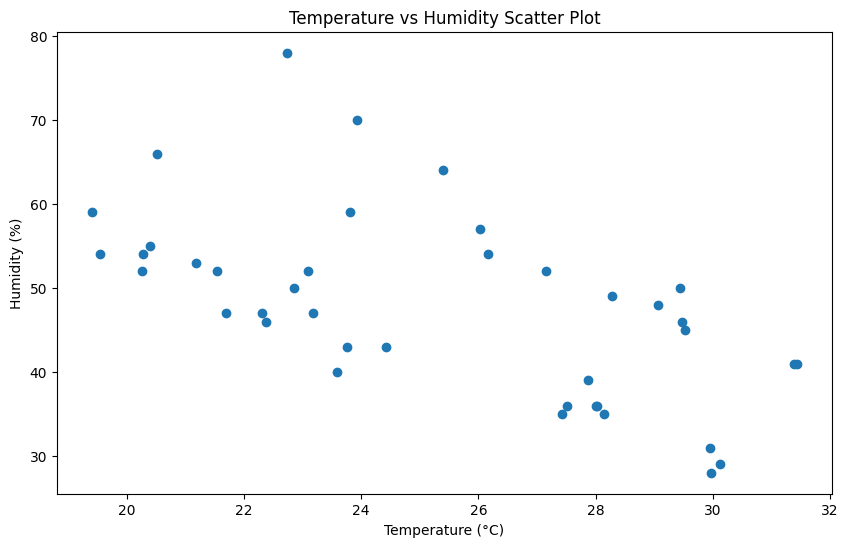

In [1]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# API Key and location for OpenWeatherMap API
api_key = "f9a929126c1bffd531cebdfa4bcceb02"
lat = 18.5204  # Latitude for Pune, India
lon = 73.8567  # Longitude for Pune, India

# API URL to fetch weather data for the given location
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

# Sending a GET request to the OpenWeatherMap API
response = requests.get(api_url)
weather_data = response.json()

# Check the keys and structure of the response
print("Weather data keys:", weather_data.keys())
print("Total weather records:", len(weather_data['list']))

# Example weather description from the first record
print("Weather description:", weather_data['list'][0]['weather'][0]['description'])

# Extracting weather data for temperature, humidity, wind speed, and weather description
temperatures = [item['main']['temp'] for item in weather_data['list']] 
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

# Creating a DataFrame with the extracted weather data
weather_df = pd.DataFrame({
    'Timestamp': timestamps, 
    'Temperature': temperatures,
    'humidity': humidity,
    'wind_speed': wind_speed,
    'weather_description': weather_description
})

# Setting 'Timestamp' as the index
weather_df.set_index('Timestamp', inplace=True)

# Calculate and print max and min temperature
max_temp = weather_df['Temperature'].max()
print("Maximum Temperature: ", max_temp)
min_temp = weather_df['Temperature'].min()
print("Minimum Temperature: ", min_temp)

# Check for any missing values
print("Missing values in the dataframe:")
print(weather_df.isnull().sum())

# Replace missing values with 0
weather_df.fillna(0, inplace=True)

# Convert temperature from Kelvin to Celsius
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float) else x)

# Display the first few rows of the dataframe
print("Weather Data Head:")
print(weather_df.head())

# Resample the data to daily means for temperature, humidity, and wind speed
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

# Plotting daily mean temperature as a line plot
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Plotting daily mean temperature as a bar plot
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting daily mean humidity as a line plot
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(color='blue', linestyle='-', marker='o', markersize=6)
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting daily mean humidity as a bar plot
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting daily mean wind speed as a line plot
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_wind_speed.index, daily_mean_wind_speed, color='green', linestyle='-', marker='x', markersize=6)
plt.title('Mean Daily Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting daily mean wind speed as a bar plot
plt.figure(figsize=(10, 6))
daily_mean_wind_speed.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Mean Daily Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Scatter plot: Temperature vs Wind Speed
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

# Hexbin plot: Temperature vs Wind Speed
plt.figure(figsize=(10, 6))
plt.hexbin(weather_df['Temperature'], weather_df['wind_speed'], gridsize=30, cmap='YlGnBu')
plt.colorbar(label='Number of Data Points')
plt.title('Hexbin: Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar plot: Daily Mean Temperature vs Wind Speed
plt.figure(figsize=(10, 6))
daily_mean_df = pd.DataFrame({
    'Temperature': daily_mean_temp,
    'Wind Speed': daily_mean_wind_speed
})
daily_mean_df.plot(kind='bar', figsize=(10, 6))
plt.title('Bar Plot: Daily Mean Temperature vs. Wind Speed')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap: Temperature vs Humidity
plt.figure(figsize=(10, 6))
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

# Scatter plot: Temperature vs Humidity
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()


### Purpose of the Code:

The purpose of the code is to retrieve, process, and visualize weather data for a specific location (Pune, India in this case) using the OpenWeatherMap API. The code performs the following tasks:

1. **Weather Data Retrieval**: Fetches weather data for the specified latitude and longitude using an API.
2. **Data Processing**: Extracts key weather information, processes it to convert temperature units, fills missing values, and creates a structured dataset.
3. **Data Analysis**: Analyzes the data by calculating daily averages of temperature, humidity, and wind speed.
4. **Data Visualization**: Provides graphical representations (line plots, bar plots, scatter plots, heatmaps) of the weather data to help identify trends and relationships between different weather parameters.

By visualizing the data, the code helps gain insights into how temperature, humidity, and wind speed behave over time, providing a clear understanding of weather patterns for the given location.

### Techniques Used:

1. **API Request and Data Retrieval**:
   - **HTTP GET Request**: The code uses the `requests` library to send a GET request to the OpenWeatherMap API. The URL is constructed dynamically using the latitude and longitude values, along with an API key for authentication. This request fetches the weather forecast data in JSON format.
   - **JSON Parsing**: The response from the API is in JSON format, and it's parsed using Python’s `json()` function to extract the relevant information.

2. **Data Manipulation**:
   - **Pandas DataFrame**: The `pandas` library is used to create a DataFrame to organize the weather data. DataFrames are ideal for working with structured data, providing easy-to-use methods for filtering, aggregation, and time-based analysis.
   - **Data Resampling**: The `resample()` method in pandas is used to resample the data to a daily frequency. This allows the aggregation of hourly or more frequent data into daily averages, making it easier to observe general trends.
   - **Handling Missing Data**: Missing values in the dataset are handled using `fillna()`, which replaces any missing (NaN) values with a default value (0 in this case).

3. **Temperature Conversion**:
   - The temperature values retrieved from the OpenWeatherMap API are in Kelvin, which is converted to Celsius using a standard formula: 
     \[
     \text{Temperature in Celsius} = \text{Temperature in Kelvin} - 273.15
     \]
   This conversion allows the temperature data to be represented in a more commonly used unit for weather analysis.

4. **Data Visualization**:
   - **Matplotlib**: The `matplotlib.pyplot` library is used to create various types of plots:
     - **Line Plots**: These are used to show how weather parameters (like temperature, humidity, and wind speed) change over time.
     - **Bar Plots**: These are used to show daily averages in a discrete way, making it easy to compare values across different days.
     - **Scatter Plots**: These visualize the relationship between two variables, such as temperature vs. wind speed.
     - **Hexbin Plots**: These are used to visualize the density of data points in a two-variable dataset. They provide a color-coded grid that shows the concentration of data points, making it useful for understanding the density of relationships.
     - **Heatmaps**: Using `seaborn`, a heatmap is created to show the correlation between different weather parameters like temperature and humidity. Color intensity represents the strength of the correlation.

5. **Data Cleaning**:
   - **Null Value Detection**: The `isnull().sum()` method in pandas is used to check if there are any missing (NaN) values in the dataset. If found, these missing values are replaced using the `fillna()` method.
   - **Data Normalization**: The temperature values are converted from Kelvin to Celsius to make the data more understandable.

6. **Time-based Analysis**:
   - **Timestamps and Indexing**: The `Timestamp` column in the dataset is converted to datetime format and set as the index. This allows for easier time-based operations, such as resampling and filtering data based on dates.

### Key Techniques Summarized:

- **API Data Retrieval**: Using HTTP requests to fetch weather data from an external API.
- **Data Extraction and Structuring**: Parsing JSON data and structuring it into a pandas DataFrame for easier manipulation.
- **Data Resampling**: Aggregating data by resampling it to daily intervals for trend analysis.
- **Data Conversion**: Converting temperature units (Kelvin to Celsius).
- **Data Cleaning**: Handling missing data by filling with zeros.
- **Data Visualization**: Using various types of plots (line, bar, scatter, hexbin, heatmap) to visualize the weather data and identify patterns.
- **Statistical Insights**: Calculating and printing the maximum and minimum temperatures and identifying trends through visualizations.

These techniques are widely used in data science and data analysis for handling, processing, and interpreting large datasets, especially in the context of time series data like weather forecasts.

Here's a detailed explanation of each step in the code without the actual code:

### 1. **Import Libraries**
- The necessary libraries are imported to handle the weather data, perform analysis, and visualize the results:
  - **requests** for making HTTP requests to fetch data from the API.
  - **pandas** for data manipulation, such as creating dataframes and resampling data.
  - **datetime** for handling date and time values.
  - **matplotlib.pyplot** and **seaborn** for creating visualizations like plots and charts.

### 2. **Set API Parameters**
- The coordinates (latitude and longitude) for the target location are set. For example, the latitude and longitude for Pune, India, are provided.
- An API key is set, which will be used for authenticating the requests to the weather service (OpenWeatherMap).

### 3. **Create API URL**
- The URL is constructed using the API key and coordinates. This URL points to the endpoint of the OpenWeatherMap API that provides the weather forecast for the specified location.

### 4. **Fetch Data from the API**
- An HTTP GET request is sent to the constructed URL to retrieve weather data in JSON format.
- The response is then parsed into a Python dictionary for easy manipulation.

### 5. **Examine the Data Structure**
- The structure of the data is explored to understand the keys and how to extract the relevant information. This helps to figure out how to navigate the JSON data.

### 6. **Extract Specific Weather Data**
- The required weather information (such as temperature, humidity, wind speed, and weather descriptions) is extracted from the JSON data.
- This involves iterating over the list of forecast data and retrieving values for each parameter.

### 7. **Create a DataFrame**
- A pandas DataFrame is created to store the extracted weather data. This makes it easier to analyze and manipulate the data.
- The DataFrame organizes the weather parameters (e.g., temperature, humidity, etc.) into columns.

### 8. **Set the Index**
- The timestamp of each weather entry is set as the index for the DataFrame. This enables time-based analysis, allowing us to easily work with data based on time.

### 9. **Find Maximum and Minimum Temperature**
- The maximum and minimum temperatures are identified using built-in functions in pandas. These values are printed for quick insight into the temperature range in the dataset.

### 10. **Check for Missing Data**
- The code checks if there are any missing (NaN) values in the dataset. This is important for ensuring data integrity and performing proper analysis.

### 11. **Fill Missing Values**
- Any missing data points in the DataFrame are filled with zeros. This ensures that the analysis can continue without errors due to missing data.

### 12. **Convert Temperature from Kelvin to Celsius**
- The temperature values provided by the API are in Kelvin. These are converted to Celsius using a mathematical formula, so they are in a more commonly used unit of measurement for temperature.

### 13. **Display the DataFrame**
- The DataFrame is printed to give an overview of the weather data, now in a structured and readable format with converted temperatures.

### 14. **Resample Data to Daily Averages**
- The data is resampled to a daily frequency, where the average values for temperature, humidity, and wind speed are computed. This is useful for identifying daily trends in the weather.

### 15. **Plot the Data (Temperature)**
- A line plot is created to visualize the daily average temperature over time. This gives a visual representation of temperature trends.

### 16. **Bar Plot for Daily Temperature**
- A bar plot is created to represent the daily average temperature. A bar plot is an alternative way to display the same data and can make comparisons between days more visually distinct.

### 17. **Line Plot for Daily Humidity**
- A line plot is created to show the trends in daily average humidity over time. This helps in understanding how humidity changes over the forecast period.

### 18. **Bar Plot for Daily Humidity**
- A bar plot is created to display the daily average humidity. The bars provide a clearer comparison between each day's humidity levels.

### 19. **Line Plot for Daily Wind Speed**
- A line plot is created to visualize the daily average wind speed. This shows how wind speed varies over the forecast period.

### 20. **Bar Plot for Daily Wind Speed**
- A bar plot is created to show the daily average wind speed. Similar to the bar plot for humidity and temperature, this helps in comparing the wind speed on different days.

### 21. **Heatmap of Daily Mean Temperature, Humidity, and Wind Speed**
- A heatmap is created to visualize the correlations between temperature, humidity, and wind speed. It uses color intensity to show the strength of the relationships between these variables, with annotations showing the exact correlation values. This helps to see patterns or dependencies between different weather parameters.

Each step is designed to extract weather data, analyze it, and provide meaningful visual insights. The visualizations and summary statistics (such as maximum temperature, mean humidity, etc.) help in understanding the weather patterns for the specified location over time.

In [1]:
import requests, json

In [2]:
import requests 
import pandas as pd 
import datetime

In [3]:
api_key = "f9a929126c1bffd531cebdfa4bcceb02"

In [5]:
lat = 18.5204
lon = 73.8567

In [6]:
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [7]:
response = requests.get(api_url)
weather_data = response.json()
weather_data.keys()
len(weather_data['list'])
weather_data['list'][0]['weather'][0]['description']

'clear sky'

In [8]:
temperatures = [item['main']['temp'] for item in weather_data['list']] 

In [9]:
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]      #retriving humidity data & putting it into list
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

In [10]:
weather_df = pd.DataFrame({'Timestamp': timestamps, 
                           'Temperature': temperatures,                #creating dataframe
                           'humidity': humidity, 
                           'wind_speed':wind_speed,
                           'weather_description': weather_description})

In [11]:
weather_df.set_index('Timestamp', inplace=True)                   #set index
max_temp = weather_df['Temperature'].max()
print("Maximum Temperature: ",max_temp)
min_temp = weather_df['Temperature'].min()
print("Minimum Temperature: ",min_temp)


Maximum Temperature:  303.69
Minimum Temperature:  292.22


In [12]:
weather_df.isnull().sum()

Temperature            0
humidity               0
wind_speed             0
weather_description    0
dtype: int64

In [13]:
weather_df.fillna(0, inplace=True)           #replacing missing values

In [14]:
print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2024-11-08 09:00:00       301.92        37        3.22           clear sky
2024-11-08 12:00:00       301.12        40        1.62           clear sky
2024-11-08 15:00:00       297.59        44        1.39           clear sky
2024-11-08 18:00:00       295.62        52        1.06           clear sky
2024-11-08 21:00:00       294.42        57        0.18           clear sky
2024-11-09 00:00:00       293.33        61        1.04           clear sky
2024-11-09 03:00:00       297.02        51        1.58           clear sky
2024-11-09 06:00:00       301.93        34        4.92           clear sky
2024-11-09 09:00:00       303.69        28        3.11           clear sky
2024-11-09 12:00:00       300.99        35        2.84           clear sky
2024-11-09 15:00:00       297.37        41        1.55           clear sky
2024-11-09 18:00:00      

In [15]:
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float)else x)

In [16]:
print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2024-11-08 09:00:00        28.77        37        3.22           clear sky
2024-11-08 12:00:00        27.97        40        1.62           clear sky
2024-11-08 15:00:00        24.44        44        1.39           clear sky
2024-11-08 18:00:00        22.47        52        1.06           clear sky
2024-11-08 21:00:00        21.27        57        0.18           clear sky
2024-11-09 00:00:00        20.18        61        1.04           clear sky
2024-11-09 03:00:00        23.87        51        1.58           clear sky
2024-11-09 06:00:00        28.78        34        4.92           clear sky
2024-11-09 09:00:00        30.54        28        3.11           clear sky
2024-11-09 12:00:00        27.84        35        2.84           clear sky
2024-11-09 15:00:00        24.22        41        1.55           clear sky
2024-11-09 18:00:00      

In [19]:
weather_df.head()

,Temperature,humidity,wind_speed,weather_description
Timestamp,,,,
2024-11-08 09:00:00,28.77,37,3.22,clear sky
2024-11-08 12:00:00,27.97,40,1.62,clear sky
2024-11-08 15:00:00,24.44,44,1.39,clear sky
2024-11-08 18:00:00,22.47,52,1.06,clear sky
2024-11-08 21:00:00,21.27,57,0.18,clear sky


In [17]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

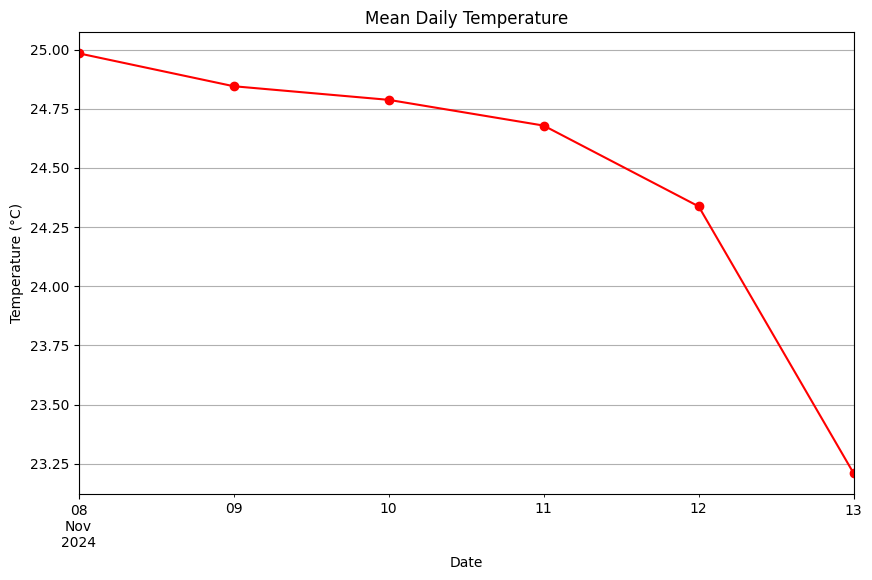

In [20]:
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')                    #line plot
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

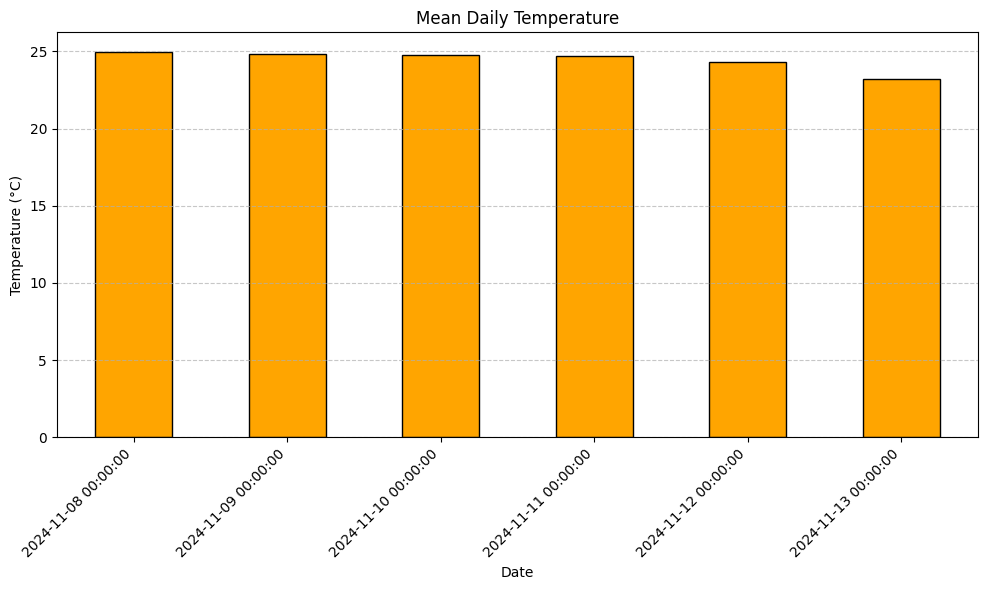

In [21]:
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(kind='bar', color='orange', edgecolor='black')  # Bar plot
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Grid lines for y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


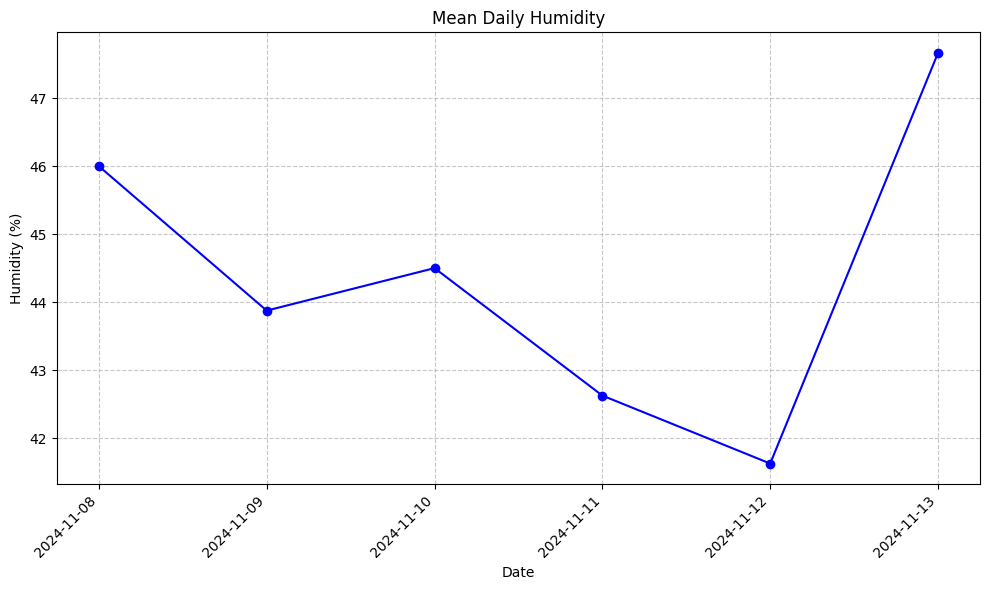

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_humidity.index, daily_mean_humidity, color='blue', linestyle='-', marker='o', markersize=6)  # Line plot
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True, linestyle='--', alpha=0.7)  # Grid lines with dashed style
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


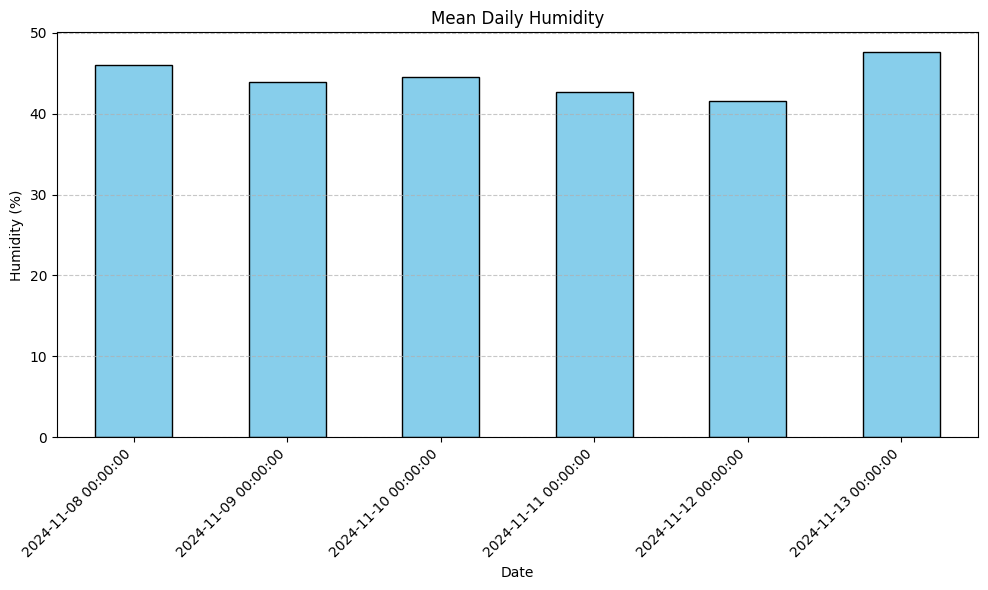

In [18]:
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='skyblue', edgecolor='black')  # Bar plot
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Grid lines for y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


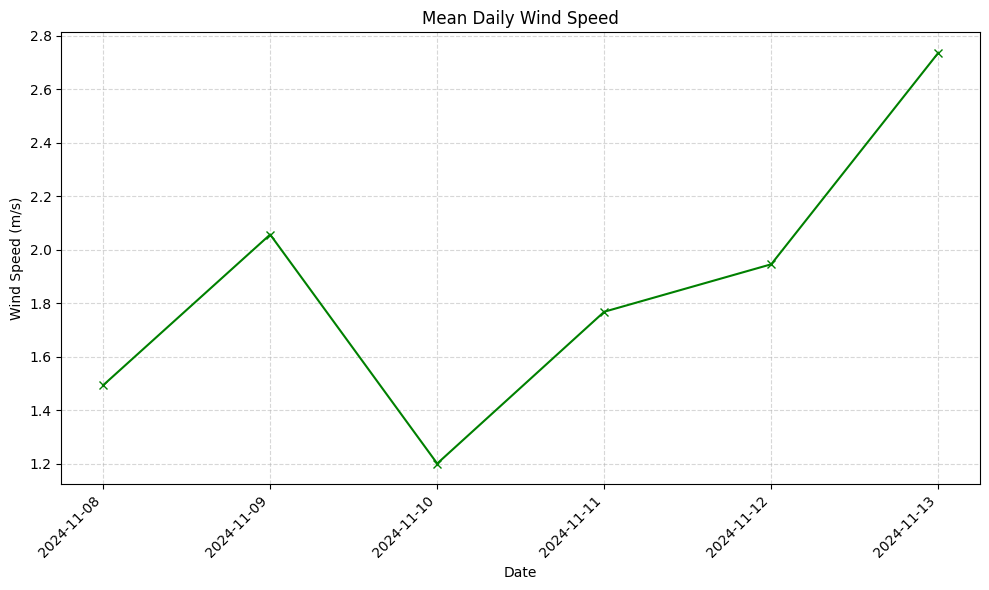

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_wind_speed.index, daily_mean_wind_speed, color='green', linestyle='-', marker='x', markersize=6)  # Line plot
plt.title('Mean Daily Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True, linestyle='--', alpha=0.5)  # Grid lines with dashed style
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


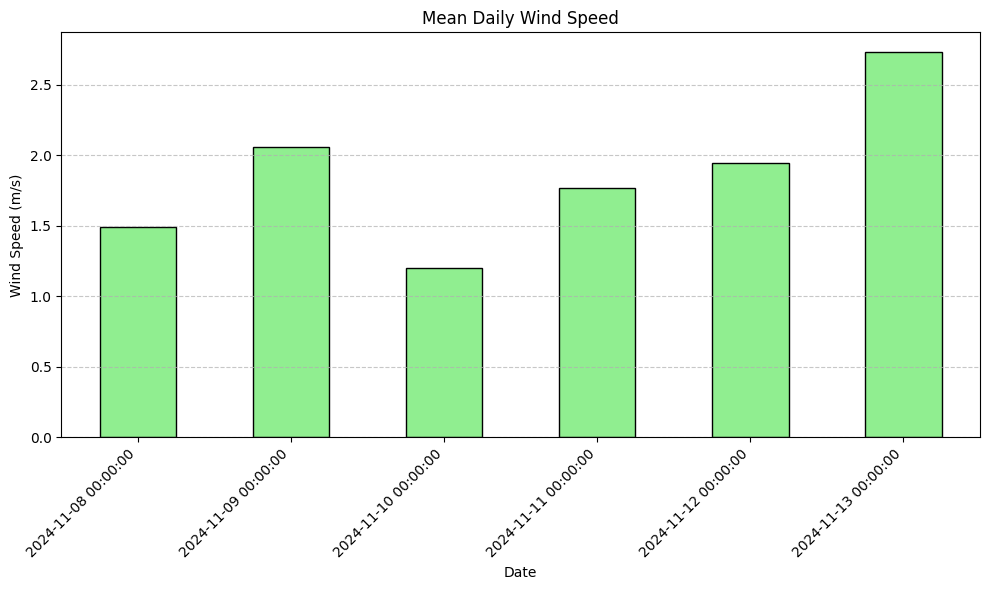

In [25]:
plt.figure(figsize=(10, 6))
daily_mean_wind_speed.plot(kind='bar', color='lightgreen', edgecolor='black')  # Bar plot
plt.title('Mean Daily Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Grid lines for y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


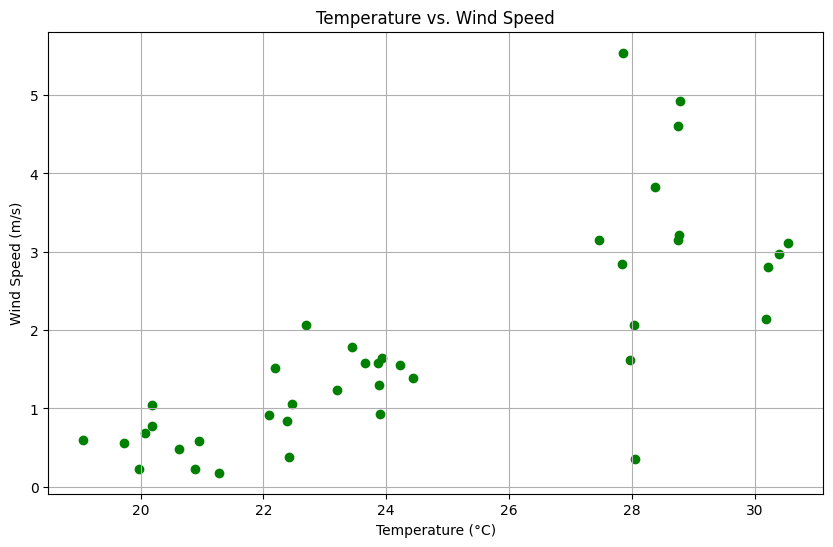

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

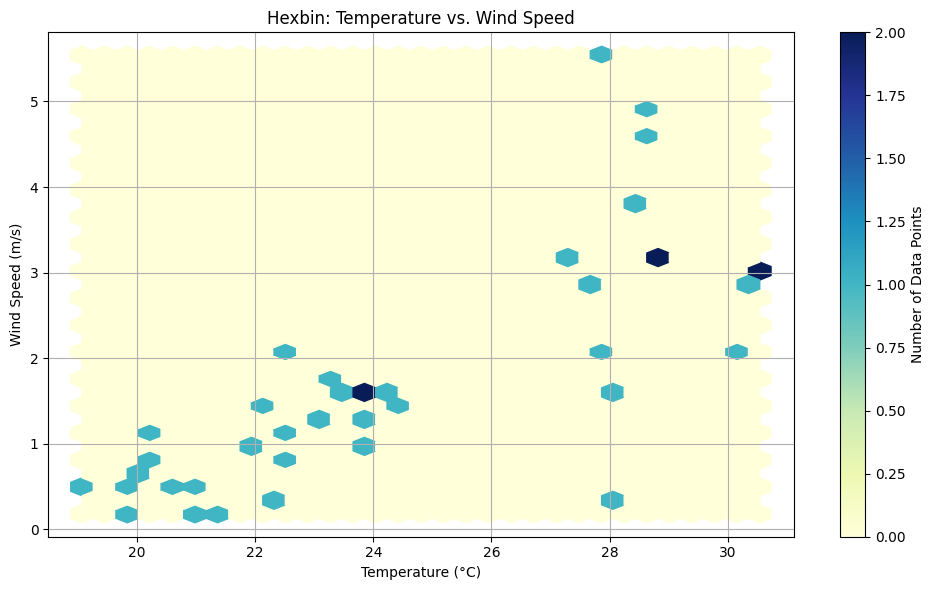

In [27]:
plt.figure(figsize=(10, 6))
plt.hexbin(weather_df['Temperature'], weather_df['wind_speed'], gridsize=30, cmap='YlGnBu')  # Hexbin plot
plt.colorbar(label='Number of Data Points')  # Adds a color bar to indicate density
plt.title('Hexbin: Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

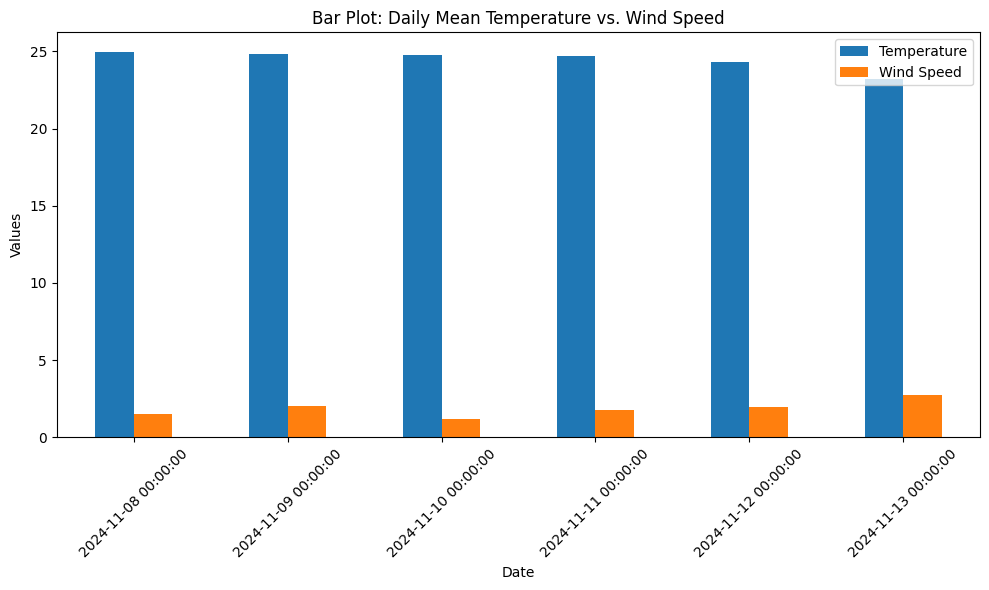

In [28]:
# Assuming daily_mean_temp and daily_mean_wind_speed are already calculated
plt.figure(figsize=(10, 6))
daily_mean_df = pd.DataFrame({
    'Temperature': daily_mean_temp,
    'Wind Speed': daily_mean_wind_speed
})
daily_mean_df.plot(kind='bar', figsize=(10, 6))
plt.title('Bar Plot: Daily Mean Temperature vs. Wind Speed')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



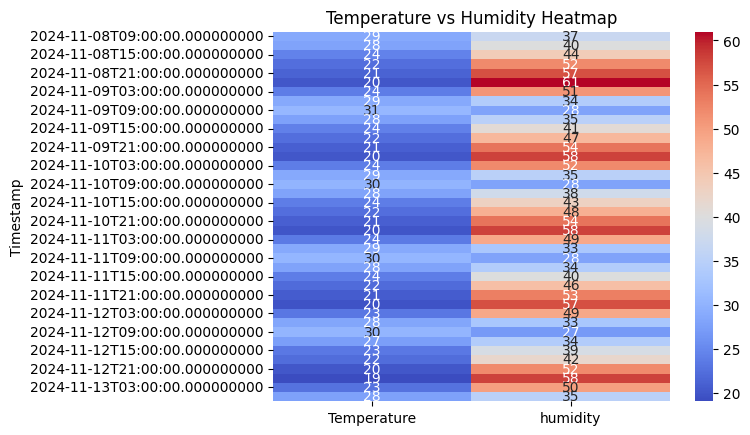

In [29]:
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

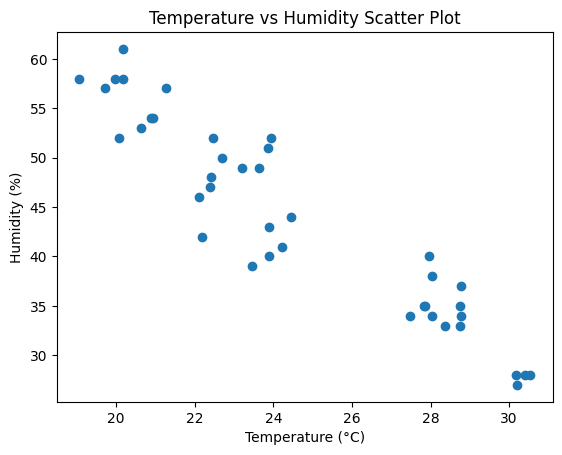

In [30]:
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()

In [ ]:
import requests, json

import requests 
import pandas as pd 
import datetime

api_key = "f9a929126c1bffd531cebdfa4bcceb02"

lat = 18.5204
lon = 73.8567

api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

response = requests.get(api_url)
weather_data = response.json()
weather_data.keys()
len(weather_data['list'])
weather_data['list'][0]['weather'][0]['description']

temperatures = [item['main']['temp'] for item in weather_data['list']] 

timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]      #retriving humidity data & putting it into list
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

weather_df = pd.DataFrame({'Timestamp': timestamps, 
                           'Temperature': temperatures,                #creating dataframe
                           'humidity': humidity, 
                           'wind_speed':wind_speed,
                           'weather_description': weather_description})

weather_df.set_index('Timestamp', inplace=True)                   #set index
max_temp = weather_df['Temperature'].max()
print("Maximum Temperature: ",max_temp)
min_temp = weather_df['Temperature'].min()
print("Minimum Temperature: ",min_temp)

weather_df.isnull().sum()

weather_df.fillna(0, inplace=True)           #replacing missing values

print(weather_df)

weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float)else x)

print(weather_df)

weather_df.head()

import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')                    #line plot
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
daily_mean_temp.plot(kind='bar', color='orange', edgecolor='black')  # Bar plot
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Grid lines for y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_mean_humidity.index, daily_mean_humidity, color='blue', linestyle='-', marker='o', markersize=6)  # Line plot
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True, linestyle='--', alpha=0.7)  # Grid lines with dashed style
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='skyblue', edgecolor='black')  # Bar plot
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Grid lines for y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_mean_wind_speed.index, daily_mean_wind_speed, color='green', linestyle='-', marker='x', markersize=6)  # Line plot
plt.title('Mean Daily Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True, linestyle='--', alpha=0.5)  # Grid lines with dashed style
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

plt.figure(figsize=(10, 6))
daily_mean_wind_speed.plot(kind='bar', color='lightgreen', edgecolor='black')  # Bar plot
plt.title('Mean Daily Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Grid lines for y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hexbin(weather_df['Temperature'], weather_df['wind_speed'], gridsize=30, cmap='YlGnBu')  # Hexbin plot
plt.colorbar(label='Number of Data Points')  # Adds a color bar to indicate density
plt.title('Hexbin: Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Assuming daily_mean_temp and daily_mean_wind_speed are already calculated
plt.figure(figsize=(10, 6))
daily_mean_df = pd.DataFrame({
    'Temperature': daily_mean_temp,
    'Wind Speed': daily_mean_wind_speed
})
daily_mean_df.plot(kind='bar', figsize=(10, 6))
plt.title('Bar Plot: Daily Mean Temperature vs. Wind Speed')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()
